In [1]:
%pylab inline

from __future__ import print_function
from __future__ import division

import pandas
import numpy
import scipy
from matplotlib import pyplot

import os
import sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn

/home/run-sm/venv/mfixman/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
sei = pandas.read_csv('/gd/sm/campaigns/inferences/sei_house_hold_income_201502_201507.txt.gz', sep = '|', index_col = 'mdn')

In [4]:
parts = []
for chunk in pandas.read_csv('/gd/sm/dev/proddata/age_201507.txt', sep = '|', index_col = 'mdn', chunksize = 1000000):
    parts.append(chunk[chunk.index.isin(sei.index)])

age = pandas.concat(parts)

In [5]:
parts = []
for chunk in pandas.read_csv('/gd/sm/dev/proddata/gender_201507.txt', sep = '|', index_col = 'mdn', chunksize = 1000000):
    parts.append(chunk[chunk.index.isin(sei.index)])

gender = pandas.concat(parts)

In [6]:
data = pandas.merge(sei, age, how = 'left', left_index = True, right_index = True).merge(gender, how = 'left', left_index = True, right_index = True)

In [8]:
data.index.size

3154362

In [13]:
data_sample = data.sample(1000)

# En español

In [ ]:
data.rename(columns = {
        'age': 'edad',
        'gender': 'genero'
    })

# Graphs

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

In [35]:
data.age.dropna().fillna(0, downcast = 'infer').dtype

dtype('int64')

In [37]:
data.age.dropna().fillna(0, downcast = 'infer').value_counts()

3    1292776
2     857260
4     601715
1     299120
Name: age, dtype: int64

In [18]:
age_dict = {
    1: '[18, 25)',
    2: '[25, 35)',
    3: '[35, 51)',
    4: '[51, ∞)'
}

gender_dict = {
    1: 'Female',
    2: 'Male'
}

In [73]:
data.head()

,cat_sei,age,gender
mdn,,,
00BADA537824053012FC41149C097D83,2,4,1
00FBD56E10D63AD6CC20894131359A3F,2,4,1
0105FB151B64C76EA066743764F39B75,1,2,1
010DFB9AA90A753B9C3604BFBFA0052A,2,3,1
01D47BBD4FE6ED8D72B41DDC0470267B,1,1,1


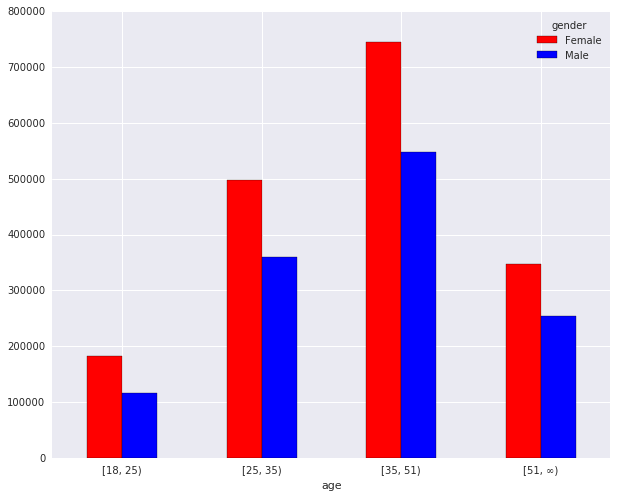

In [19]:
pandas.crosstab(data.age, data.gender).rename(index = age_dict, columns = gender_dict).plot(kind = 'bar', color = ['r', 'b'], rot = 0)
# pyplot.title(u'Edad y género')

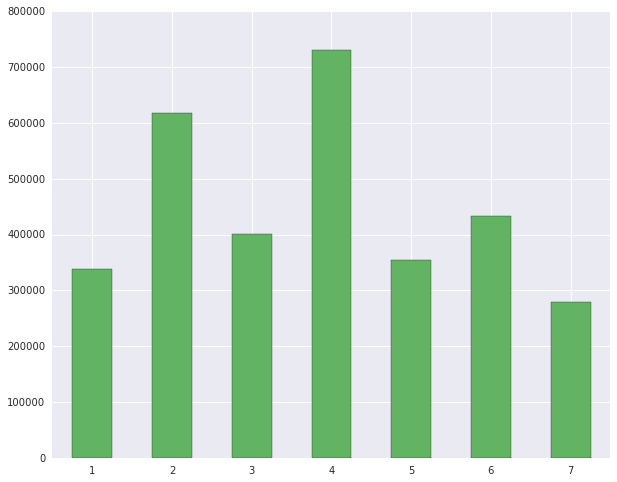

In [13]:
data.cat_sei.value_counts(sort = False).plot(kind = 'bar', rot = 0, color = seaborn.xkcd_rgb['boring green'])
# pyplot.title(u'Nivel socioeconómico')

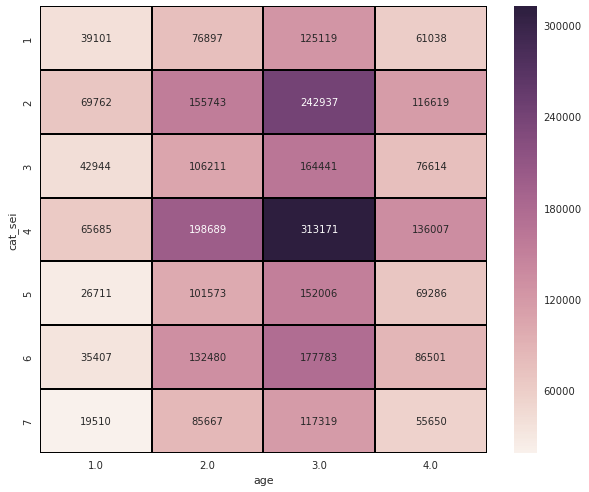

In [138]:
seaborn.heatmap(pandas.crosstab(data.cat_sei, data.age), robust = False, annot = True, fmt = '.0f', linewidths = 1, linecolor = seaborn.xkcd_rgb['black'])

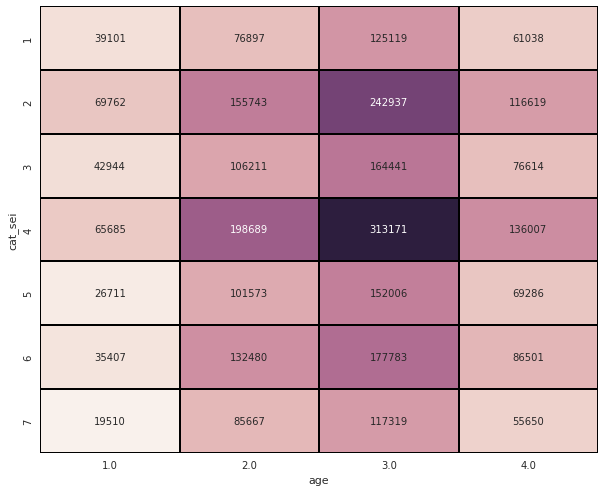

In [14]:
seaborn.heatmap(pandas.crosstab(data.cat_sei, data.age), robust = False, annot = True, fmt = '.0f', linewidths = 1, linecolor = seaborn.xkcd_rgb['black'], cbar = False)
# pyplot.title(u'Cantidad de usuarios con cada nivel socioeconómico por edad')

# sum_links

In [10]:
sum_links = pandas.concat(
    [
        x[x.OriginLineSurrKey.isin(data.index) & x.TargetLineSurrKey.isin(data.index)]
        for x in pandas.read_csv(
            '/home/run-sm/mfixman/sum_links_201512_201602.txt.gz',
            engine = 'c',
            sep = '|',
            usecols = ['OriginLineSurrKey', 'TargetLineSurrKey', 'CallsTotal'],
            chunksize = 100000
        )
    ],
    ignore_index = True
)


MemoryError: 

In [ ]:

sum_links.rename(
    columns = {
        'OriginLineSurrKey': 'origin',
        'TargetLineSurrKey': 'target',
        'AllCallsTotal': calls
    },
    inplace = True
)

In [ ]:
!mail -s "Termino" mfixman@grandata.com < /dev/null

#  

 